# CSV/Excel 데이터 분석 Agent
Pandas DataFrame 을 활용하여 분석을 수행하는 Agent 를 생성할 수 있습니다.

CSV/Excel 데이터로부터 Pandas DataFrame 객체를 생성할 수 있으며, 이를 활용하여 Agent 가 Pandas query 를 생성하여 분석을 수행할 수 있습니다.

In [ ]:
from dotenv import load_dotenv
load_dotenv()

In [1]:
import pandas as pd

df = pd.read_csv("./data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser
import seaborn as sns

from langchain_experimental.agents import create_pandas_dataframe_agent

sns.set_style("white")

In [5]:
llm = ChatOpenAI(model="gpt-4o-mini")

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True
)
stream_parser = AgentStreamParser()

In [6]:
def ask(query):
    response = agent.stream({"input": query})
    for step in response:
        stream_parser.process_agent_steps(step)

In [7]:
ask("몇개의 행이 있어?")



> Entering new None chain...
[도구 호출]
Tool: python_repl_ast
query: len(df)
Log: 
Invoking: `python_repl_ast` with `{'query': 'len(df)'}`




Invoking: `python_repl_ast` with `{'query': 'len(df)'}`


891[관찰 내용]
Observation: 891
데이터프레임 `df`에는 891개의 행이 있습니다.

> Finished chain.
[최종 답변]
데이터프레임 `df`에는 891개의 행이 있습니다.


In [9]:
ask("남자와 여자의 생존율의 차이는 몇이야?")



> Entering new None chain...
[도구 호출]
Tool: python_repl_ast
query: male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()
female_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()
survival_rate_difference = female_survival_rate - male_survival_rate
survival_rate_difference
Log: 
Invoking: `python_repl_ast` with `{'query': "male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()\nfemale_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()\nsurvival_rate_difference = female_survival_rate - male_survival_rate\nsurvival_rate_difference"}`




Invoking: `python_repl_ast` with `{'query': "male_survival_rate = df[df['Sex'] == 'male']['Survived'].mean()\nfemale_survival_rate = df[df['Sex'] == 'female']['Survived'].mean()\nsurvival_rate_difference = female_survival_rate - male_survival_rate\nsurvival_rate_difference"}`


0.5531300709799203[관찰 내용]
Observation: 0.5531300709799203
남자와 여자의 생존율의 차이는 약 0.553입니다. 즉, 여자의 생존율이 남자보다 약 55.3% 더 높습니다.

> Finished chain.
[

In [12]:
ask("남자승격와 여자 승객의 각각 생존자 수는 어떻게 돼?")



> Entering new None chain...
[도구 호출]
Tool: python_repl_ast
query: survived_counts = df.groupby(['Sex', 'Survived']).size().unstack() 
survived_counts
Log: 
Invoking: `python_repl_ast` with `{'query': "survived_counts = df.groupby(['Sex', 'Survived']).size().unstack() \nsurvived_counts"}`




Invoking: `python_repl_ast` with `{'query': "survived_counts = df.groupby(['Sex', 'Survived']).size().unstack() \nsurvived_counts"}`


Survived    0    1
Sex               
female     81  233
male      468  109[관찰 내용]
Observation: Survived    0    1
Sex               
female     81  233
male      468  109
남자 승객과 여자 승객의 각각 생존자 수는 다음과 같습니다:

- **여자 승객**: 생존자 233명, 비생존자 81명
- **남자 승객**: 생존자 109명, 비생존자 468명

> Finished chain.
[최종 답변]
남자 승객과 여자 승객의 각각 생존자 수는 다음과 같습니다:

- **여자 승객**: 생존자 233명, 비생존자 81명
- **남자 승객**: 생존자 109명, 비생존자 468명




> Entering new None chain...
[도구 호출]
Tool: python_repl_ast
query: import pandas as pd
import matplotlib.pyplot as plt

# 남자와 여자 승객의 생존율 계산
survival_rates = df.groupby('Sex')['Survived'].mean()

# 바차트 시각화
survival_rates.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()
Log: 
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# 남자와 여자 승객의 생존율 계산\nsurvival_rates = df.groupby('Sex')['Survived'].mean()\n\n# 바차트 시각화\nsurvival_rates.plot(kind='bar', color=['blue', 'pink'])\nplt.title('Survival Rates by Gender')\nplt.xlabel('Gender')\nplt.ylabel('Survival Rate')\nplt.xticks(rotation=0)\nplt.show()"}`




Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# 남자와 여자 승객의 생존율 계산\nsurvival_rates = df.groupby('Sex')['Survived'].mean()\n\n# 바차트 시각화\nsurvival_rates.plot(kind='bar', color=['bl

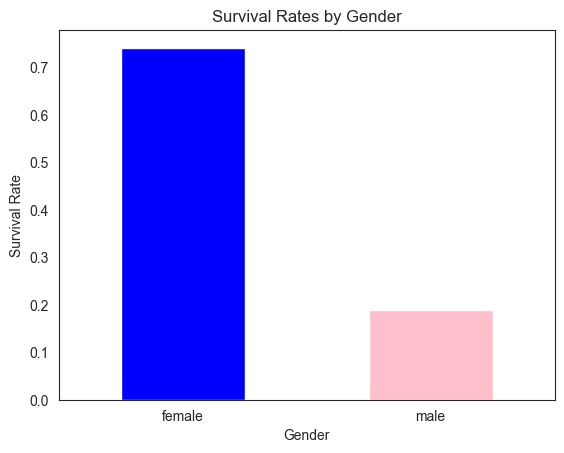

[관찰 내용]
Observation: 
남자와 여자 승객의 생존율을 계산하고 바 차트로 시각화한 결과입니다. 남성은 상대적으로 낮은 생존율을 보였고, 여성은 높은 생존율을 보였습니다.

> Finished chain.
[최종 답변]
남자와 여자 승객의 생존율을 계산하고 바 차트로 시각화한 결과입니다. 남성은 상대적으로 낮은 생존율을 보였고, 여성은 높은 생존율을 보였습니다.


In [11]:
ask("남자 승객과 여자 승객의 생존율을 구한뒤 barplot 차트로 시각화 해줘")



> Entering new None chain...


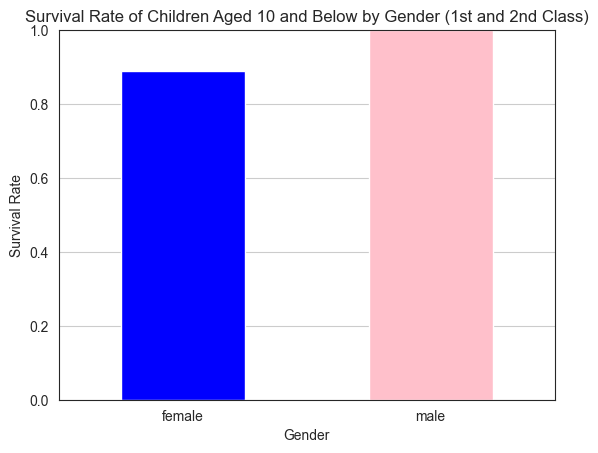

[도구 호출]
Tool: python_repl_ast
query: import pandas as pd
import matplotlib.pyplot as plt

# 필터링: 1, 2등급에 탑승하고 나이가 10세 이하인 어린이
children = df[(df['Pclass'].isin([1, 2])) & (df['Age'] <= 10)]

# 성별별 생존율 계산
survival_rate = children.groupby('Sex')['Survived'].mean()

# 시각화
survival_rate.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate of Children Aged 10 and Below by Gender (1st and 2nd Class)')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
Log: 
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\n# 필터링: 1, 2등급에 탑승하고 나이가 10세 이하인 어린이\nchildren = df[(df['Pclass'].isin([1, 2])) & (df['Age'] <= 10)]\n\n# 성별별 생존율 계산\nsurvival_rate = children.groupby('Sex')['Survived'].mean()\n\n# 시각화\nsurvival_rate.plot(kind='bar', color=['blue', 'pink'])\nplt.title('Survival Rate of Children Aged 10 and Below by Gender (1st and 2nd Class)')\nplt.xlabel('Gender')\nplt.ylabel('S

In [13]:
ask("1,2등급에 탑승한 10세 이하 어린 아이의 성별별 생존율을 구하고 시각화 하세요")